In [3]:
from TradingviewData import TradingViewData,Interval

request = TradingViewData()

In [6]:
request.search('CHAINLINK','LINK')

Expecting value: line 1 column 1 (char 0)


[]

In [12]:
nifty_data = request.get_hist(symbol='LINKUSD',exchange='Binance',interval=Interval.daily,n_bars=1500)

nifty_data

,symbol,open,high,low,close,volume
datetime,,,,,,
2021-12-14 01:00:00,Binance:LINKUSD,17.818907,18.967629,17.337022,18.456520,1.165553e+06
2021-12-15 01:00:00,Binance:LINKUSD,18.466359,20.756978,17.257739,19.694958,1.896719e+06
2021-12-16 01:00:00,Binance:LINKUSD,19.710976,20.387441,18.694021,18.776511,1.197452e+06
2021-12-17 01:00:00,Binance:LINKUSD,18.795728,19.532356,17.536484,18.301817,1.498724e+06
2021-12-18 01:00:00,Binance:LINKUSD,18.258267,20.334503,17.820244,19.559275,1.533685e+06
...,...,...,...,...,...,...
2026-01-17 01:00:00,Binance:LINKUSD,13.717845,13.884912,13.629019,13.733303,3.410549e+04
2026-01-18 01:00:00,Binance:LINKUSD,13.731436,13.871785,13.305880,13.327990,4.992477e+05
2026-01-19 01:00:00,Binance:LINKUSD,13.303854,13.303854,12.400560,12.876356,1.772122e+05


<Axes: >

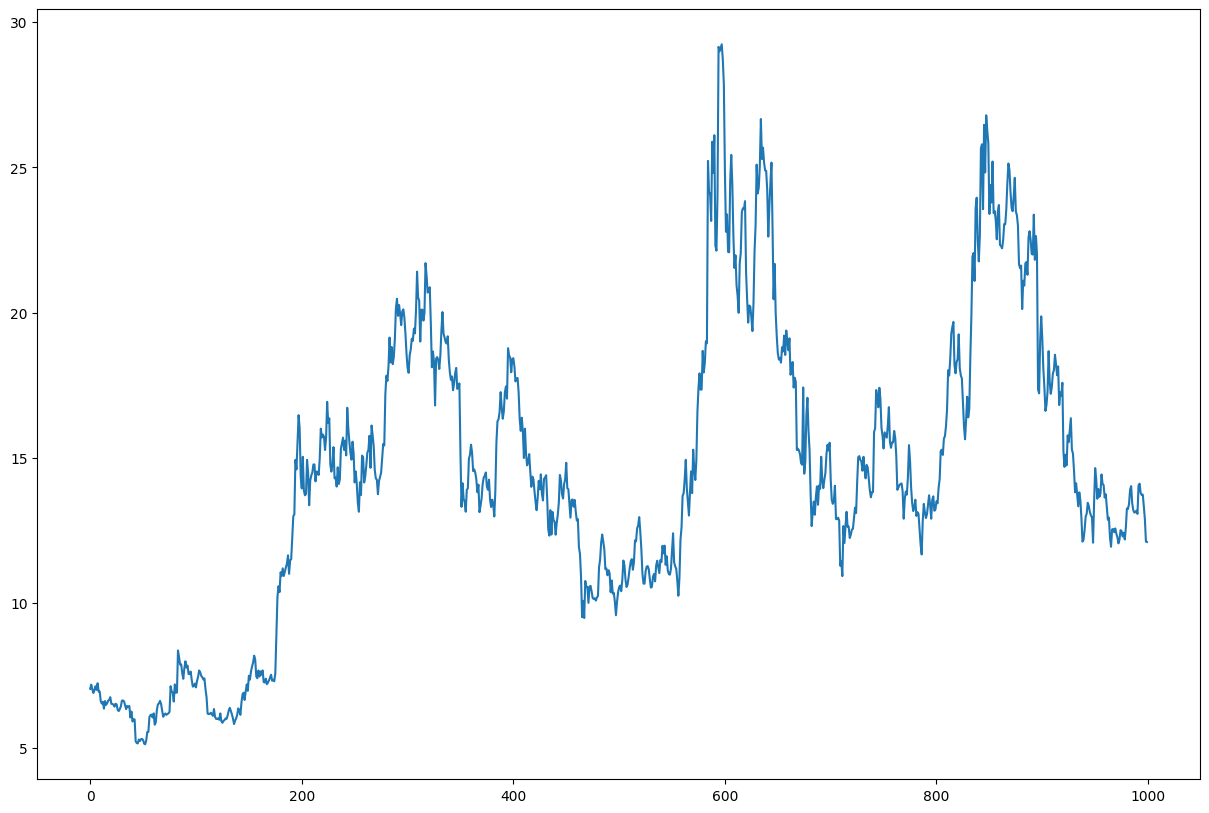

In [11]:
nifty_data.close.plot(figsize=(15,10),use_index=False)

In [14]:
import os
import pandas as pd

df = nifty_data.copy()
df = df.reset_index()

df['date'] = pd.to_datetime(df['datetime']).dt.date

df = df[['date', 'open', 'high', 'low', 'close', 'volume']]

SYMBOL = "LINKUSD"
EXCHANGE = "BINANCE"
INTERVAL = "daily"
BASE_PATH = "data/crypto/tradingview"

df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month.astype(str).str.zfill(2)

for (year, month), group in df.groupby(['year', 'month']):
    
    folder_path = (
        f"{BASE_PATH}/{EXCHANGE}/{SYMBOL}/"
        f"interval{INTERVAL}/"
        f"year{year}/month{month}"
    )
    
    os.makedirs(folder_path, exist_ok=True)
    
    file_path = f"{folder_path}/data.csv"
    
    group.drop(columns=['year', 'month']).to_csv(
        file_path,
        index=False
    )

print("CSV generados con carpetas yearYYYY y monthMM")


CSV generados con carpetas yearYYYY y monthMM
